# The Perceptron


Let's begin with a brief review of what the Perceptron is! One of the most basic structures of machine learning is this single-neuron model, which functions similarly to an actual neuron that could be found in the brain. Here is an image of the Perceptron structure (and one of Dr. Davila's favorite images to reference back to :)):

<div style="display: flex;" align= 'center'>
    <div style="margin-right: 20px;">
        <img src="ThePerceptronImage.png" width="550" height="300"
    </div>
<div>

The Perceptron takes in a few inputs, denoted $x_1, x_2,...,x_n$. Each of these inputs are multiplied by their respective weights: $w_1, w_2,...,w_n$. These multiplied values are then added together to get a final Weighted Sum (This is called a linear combination in linear algebra!). We also add the bias, which essentially shifts the activation function curve up and down (more on the function below!).

The next big step is to pass this sum into the activation function (the sign function) such that information is binarily classified. Lastly, the post-activation function, or cost function, will help correct any ouputs that have been classified incorrectly by our single neuron model.

# Application

### Classifying Adelie and Chinstrap Penguins



In the Palmer Penguins dataset, the labels -1 and 1 represent the two classes into which the penguines are classified:

Adelie = -1

Chinstrap = 1

In this notebook, we will build a model that predicts whether a penguin is an Adelie penguin or a Chinstrap penguin based on two characteristics: its bill length and bill depth. This is a binary classification problem, and my first attempt at machine learning!



To begin: here is a Perceptron class that gives all the specifics of the math behind the single neuron model: 

In [31]:
#We import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix


We use the Perceptron class provided to us from class. There is also a Perceptron import from sklearn, but we use this one in order to track errors later on!

In [32]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

We then load in the data and drop any NaN rows. We also find out how many unique species exist.

In [33]:
# Load the Palmer Penguins dataset and drop NaN rows
penguins = pd.read_csv(r"C:\Users\faith\inde 577\577repo\Supervised Learning\Datasets\palmer_penguins.csv")
penguins = penguins.dropna()

#We find out that there are three distinct penguin species.
penguins['species'].unique() 

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

We will remove one of the penguin species, because this is a binary classification problem, after all. As such, we will just be sorting between Adelie and Chinstrap penguins. We can also draw boundaries between 2+ categories, but for the sake of this notebook, we will just do two. 

<div style="display: flex;">
    <div style="margin-right: 20px;">
        <img src="adelie_penguin.jpg" width="100" height="150">
        <p>Adelie Penguin</p>
    </div>
    <div>
        <img src="chinstrap_penguin.jpg" width="100" height="150">
        <p>Chinstrap Penguin</p>
    </div>
</div>



In [34]:
penguins = penguins[penguins['species'].isin(['Adelie', 'Chinstrap'])]
penguins['species'].unique() 


array(['Adelie', 'Chinstrap'], dtype=object)

We assign target variables with values. Our goal is to be able to predict whether a penguin is an Adelie Penguin or a Chinstrap penguin given information on bill length and bill depth.

In [35]:
# Select features and target variable
X = penguins[['bill_length_mm', 'bill_depth_mm']].values

# Convert each entry of y with Adelie to -1 and otherwise 1
y = penguins.species.values
y = np.where(y == 'Adelie', -1, 1)


In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
clf = Perceptron(epochs=20_000)
clf.train(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)


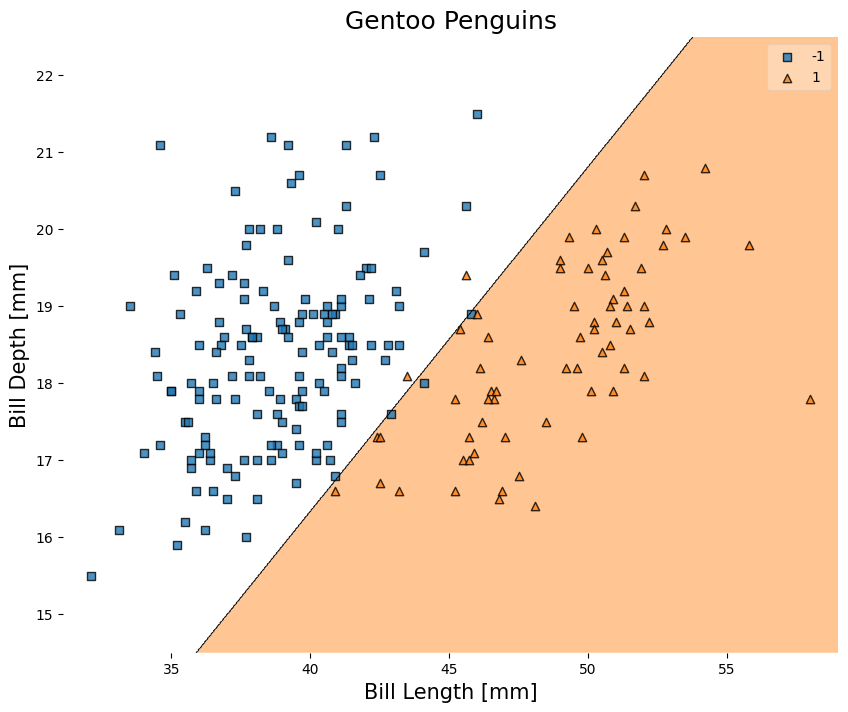

In [38]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.title("Gentoo Penguins", fontsize = 18)
plt.xlabel("Bill Length [mm]", fontsize = 15)
plt.ylabel("Bill Depth [mm]", fontsize = 15)
plt.show()


Accuracy: 0.9692307692307692
Confusion Matrix:
 [[40  2]
 [ 0 23]]
Number of errors: 2


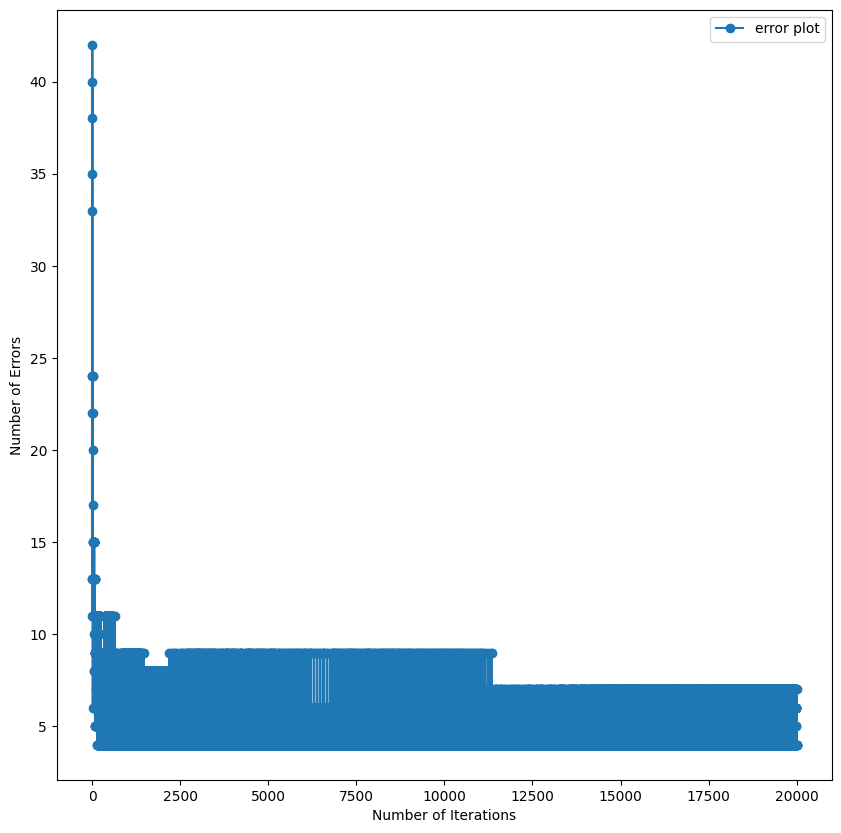

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#The accuracy is pretty good!

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)


#We check for errors and plot the results per epoch!
errors = sum(y_test != y_pred)
print("Number of errors:", errors)
#Only two errors!

plt.figure(figsize = (10, 10))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Number of Iterations")
plt.ylabel("Number of Errors")
plt.legend()
plt.show()

Luckily, this data is linearly separable! But we may enter a situation where the data is not so easily separable. We will encounter instances of this as you work your way through this repository! 
